In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(train)

891

In [5]:
print('[train dataset null check]')
print(pd.isnull(train).sum())
print('==========================')

print('[test dataset null check]')
print(pd.isnull(test).sum())

[train dataset null check]
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
[test dataset null check]
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1


In [7]:
test_fare_mean = round(test["Fare"].mean(), 4) # will fill in empty cell with mean value
test_fare_mean

35.6272

In [8]:
from sklearn.model_selection import train_test_split 

train["Embarked"] = train["Embarked"].fillna(3) # 1, 2, 3
test["Embarked"] = test["Embarked"].fillna(3)

test["Fare"] = test["Fare"].fillna(test_fare_mean)

drop_columns = ['Name','Age','Ticket','Cabin']
train_simple = train.drop(drop_columns, axis=1)

train_drop_columns = ['Survived', 'PassengerId']
train_simple = train_simple.drop(train_drop_columns, axis=1)

test_simple = test.drop(drop_columns, axis=1)

target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(train_simple, target, test_size = 0.2, random_state = 0)

In [9]:
train_simple.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,7.2500,1.0
1,1,1,1,0,71.2833,2.0
2,3,1,0,0,7.9250,1.0
3,1,1,1,0,53.1000,1.0
4,3,0,0,0,8.0500,1.0


In [10]:
print(pd.isnull(train_simple).sum())

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [11]:
test_simple.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,892,3,0,0,0,7.8292,3
1,893,3,1,1,0,7.0000,1
2,894,2,0,0,0,9.6875,3
3,895,3,0,0,0,8.6625,1
4,896,3,1,1,1,12.2875,1


In [12]:
print(pd.isnull(test_simple).sum())

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.89


In [14]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

69.83


In [15]:
x_train

,Pclass,Sex,SibSp,Parch,Fare,Embarked
140,3,1,0,2,15.2458,2.0
439,2,0,0,0,10.5000,1.0
817,2,0,1,1,37.0042,2.0
378,3,0,0,0,4.0125,2.0
491,3,0,0,0,7.2500,1.0
...,...,...,...,...,...,...
835,1,1,1,1,83.1583,2.0
192,3,1,1,0,7.8542,1.0
629,3,0,0,0,7.7333,3.0
559,3,1,1,0,17.4000,1.0


In [16]:
len(x_train.columns)

6

In [17]:
num_features = len(x_train.columns) #6
num_class = 2 # [0, 1]

In [18]:
import torch
import torch.nn as nn


class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=num_features, out_features=num_class, bias=True)
    
    def forward(self, x):
        x = self.linear(x)
        return x

    
class MLPModel(nn.Module):
    def __init__(self, in_dim, out_dim, hid_dim, n_layer): 
        super(MLPModel, self).__init__()

        self.in_dim = in_dim
        self.out_dim = out_dim
        self.hid_dim = hid_dim
        self.n_layer = n_layer

        self.fc = nn.Linear(self.in_dim, self.hid_dim)
        self.linears = nn.ModuleList()

        for i in range(self.n_layer-1):
            self.linears.append(nn.Linear(self.hid_dim, self.hid_dim))

        self.fc2 = nn.Linear(self.hid_dim, self.out_dim)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.fc(x))        

        for hidden_layer in self.linears:
            x = self.relu(hidden_layer(x))

        x = self.fc2(x)
        
        return x

In [19]:
criterion = nn.CrossEntropyLoss()

In [20]:
X_train = np.array(x_train)
X_val = np.array(x_val)

y_train = np.array(y_train)
y_val = np.array(y_val)

In [21]:
import matplotlib.pyplot as plt

def plot(list_epoch, list_train_loss, list_val_loss, list_acc_epoch, list_acc):   
    
    fig = plt.figure(figsize=(15,5))
    
    # ====== Loss Fluctuation ====== #
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(list_epoch, list_train_loss, label='train_loss')
    ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.grid()
    ax1.legend()
    ax1.set_title('epoch vs loss')
    
    # ====== Metric Fluctuation ====== #
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(list_acc_epoch, list_acc, marker='x', label='Val Accuracy metric')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('Acc')
    ax2.grid()
    ax2.legend()
    ax2.set_title('epoch vs Accuracy')
    
    plt.show()

[1. n_layer: 1 || hidden_unit: 500]
Epoch:  0 Accuracy:  38.547486033519554 % || MAX_acc:  38.547486033519554 %
Epoch:  200 Accuracy:  76.53631284916202 % || MAX_acc:  76.53631284916202 %
Epoch:  400 Accuracy:  74.30167597765363 % || MAX_acc:  80.44692737430168 %
Epoch:  600 Accuracy:  77.09497206703911 % || MAX_acc:  81.56424581005587 %
Epoch:  800 Accuracy:  79.3296089385475 % || MAX_acc:  81.56424581005587 %
Epoch:  1000 Accuracy:  79.88826815642457 % || MAX_acc:  81.56424581005587 %
Epoch:  1200 Accuracy:  78.77094972067039 % || MAX_acc:  81.56424581005587 %
Epoch:  1400 Accuracy:  79.3296089385475 % || MAX_acc:  81.56424581005587 %
Epoch:  1600 Accuracy:  79.3296089385475 % || MAX_acc:  81.56424581005587 %
Epoch:  1800 Accuracy:  79.3296089385475 % || MAX_acc:  81.56424581005587 %


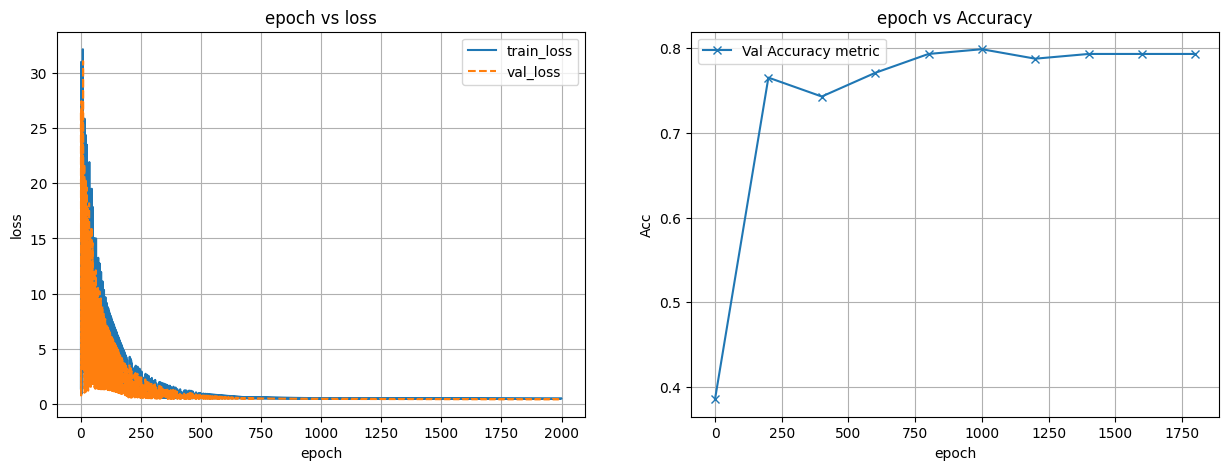

[1. n_layer: 1 || hidden_unit: 300]
Epoch:  0 Accuracy:  38.547486033519554 % || MAX_acc:  38.547486033519554 %
Epoch:  200 Accuracy:  75.41899441340783 % || MAX_acc:  77.09497206703911 %
Epoch:  400 Accuracy:  72.62569832402235 % || MAX_acc:  80.44692737430168 %
Epoch:  600 Accuracy:  79.3296089385475 % || MAX_acc:  81.56424581005587 %
Epoch:  800 Accuracy:  79.88826815642457 % || MAX_acc:  83.24022346368714 %
Epoch:  1000 Accuracy:  81.00558659217877 % || MAX_acc:  83.24022346368714 %
Epoch:  1200 Accuracy:  81.56424581005587 % || MAX_acc:  83.24022346368714 %
Epoch:  1400 Accuracy:  81.56424581005587 % || MAX_acc:  83.24022346368714 %
Epoch:  1600 Accuracy:  82.12290502793296 % || MAX_acc:  83.24022346368714 %
Epoch:  1800 Accuracy:  82.12290502793296 % || MAX_acc:  83.24022346368714 %


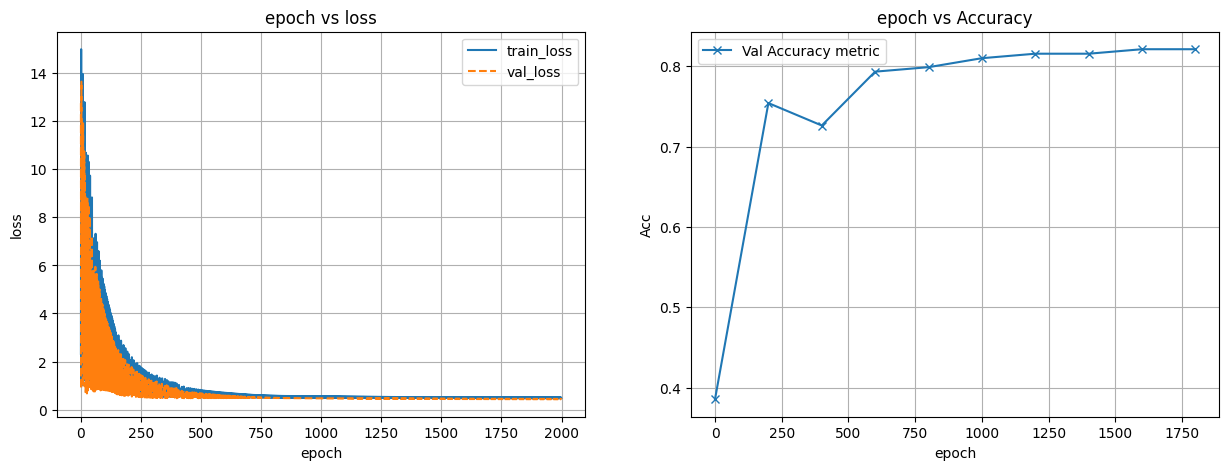

[2. n_layer: 2 || hidden_unit: 500]
Epoch:  0 Accuracy:  38.547486033519554 % || MAX_acc:  38.547486033519554 %
Epoch:  200 Accuracy:  69.83240223463687 % || MAX_acc:  75.41899441340783 %
Epoch:  400 Accuracy:  75.41899441340783 % || MAX_acc:  79.3296089385475 %
Epoch:  600 Accuracy:  77.6536312849162 % || MAX_acc:  82.12290502793296 %
Epoch:  800 Accuracy:  80.44692737430168 % || MAX_acc:  82.12290502793296 %
Epoch:  1000 Accuracy:  81.56424581005587 % || MAX_acc:  82.12290502793296 %
Epoch:  1200 Accuracy:  79.3296089385475 % || MAX_acc:  82.68156424581005 %
Epoch:  1400 Accuracy:  79.3296089385475 % || MAX_acc:  83.24022346368714 %
Epoch:  1600 Accuracy:  79.3296089385475 % || MAX_acc:  83.24022346368714 %
Epoch:  1800 Accuracy:  81.56424581005587 % || MAX_acc:  83.24022346368714 %


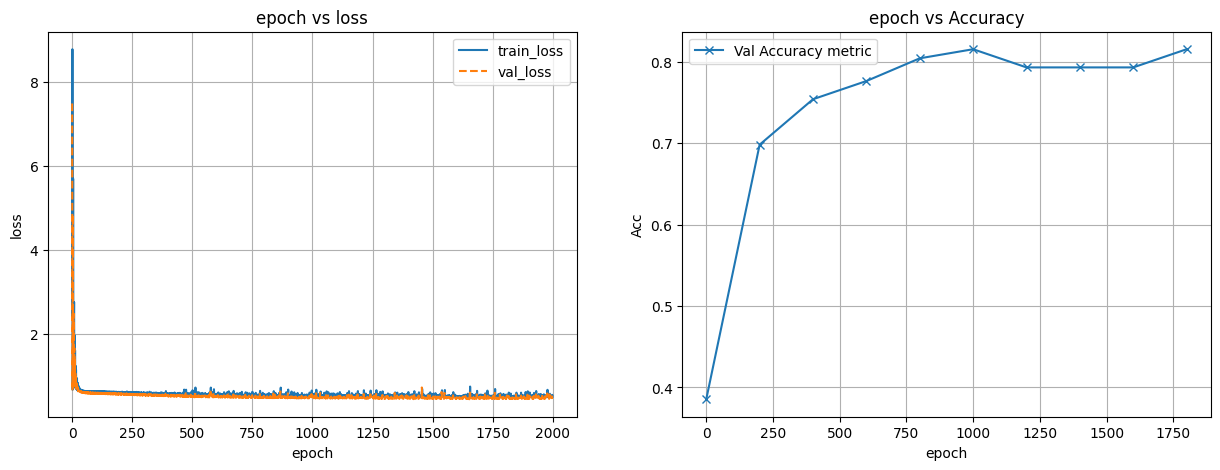

[2. n_layer: 2 || hidden_unit: 300]
Epoch:  0 Accuracy:  38.547486033519554 % || MAX_acc:  38.547486033519554 %
Epoch:  200 Accuracy:  74.86033519553072 % || MAX_acc:  75.41899441340783 %
Epoch:  400 Accuracy:  75.41899441340783 % || MAX_acc:  75.97765363128491 %
Epoch:  600 Accuracy:  77.6536312849162 % || MAX_acc:  78.2122905027933 %
Epoch:  800 Accuracy:  78.77094972067039 % || MAX_acc:  79.3296089385475 %
Epoch:  1000 Accuracy:  79.3296089385475 % || MAX_acc:  80.44692737430168 %
Epoch:  1200 Accuracy:  79.88826815642457 % || MAX_acc:  80.44692737430168 %
Epoch:  1400 Accuracy:  81.00558659217877 % || MAX_acc:  81.00558659217877 %
Epoch:  1600 Accuracy:  80.44692737430168 % || MAX_acc:  82.12290502793296 %
Epoch:  1800 Accuracy:  78.2122905027933 % || MAX_acc:  82.68156424581005 %


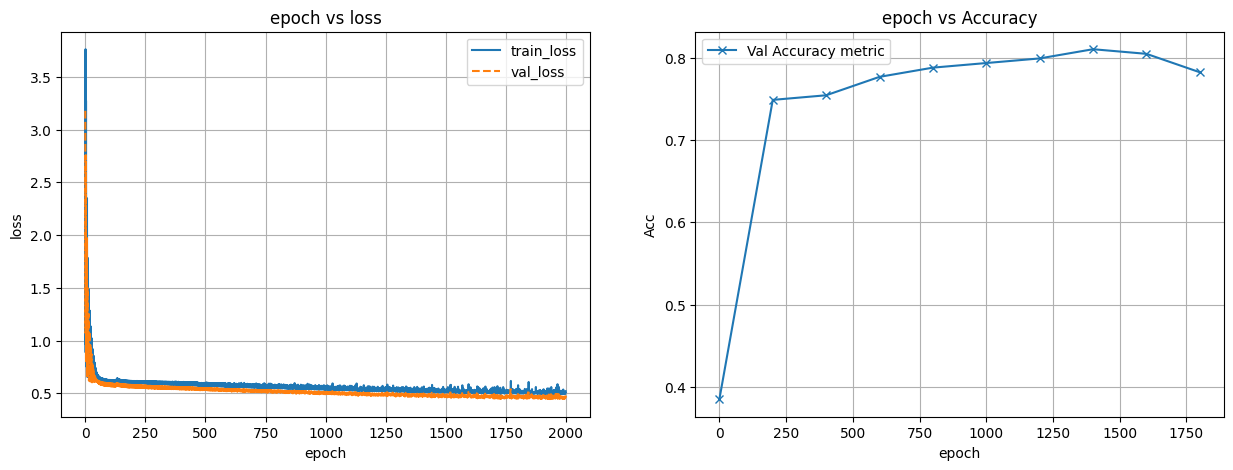

[3. n_layer: 3 || hidden_unit: 500]
Epoch:  0 Accuracy:  38.547486033519554 % || MAX_acc:  38.547486033519554 %
Epoch:  200 Accuracy:  73.18435754189943 % || MAX_acc:  74.30167597765363 %
Epoch:  400 Accuracy:  75.41899441340783 % || MAX_acc:  75.97765363128491 %
Epoch:  600 Accuracy:  78.77094972067039 % || MAX_acc:  79.3296089385475 %
Epoch:  800 Accuracy:  78.77094972067039 % || MAX_acc:  80.44692737430168 %
Epoch:  1000 Accuracy:  78.77094972067039 % || MAX_acc:  81.00558659217877 %
Epoch:  1200 Accuracy:  81.00558659217877 % || MAX_acc:  82.68156424581005 %
Epoch:  1400 Accuracy:  80.44692737430168 % || MAX_acc:  82.68156424581005 %
Epoch:  1600 Accuracy:  77.09497206703911 % || MAX_acc:  83.24022346368714 %
Epoch:  1800 Accuracy:  79.88826815642457 % || MAX_acc:  83.24022346368714 %


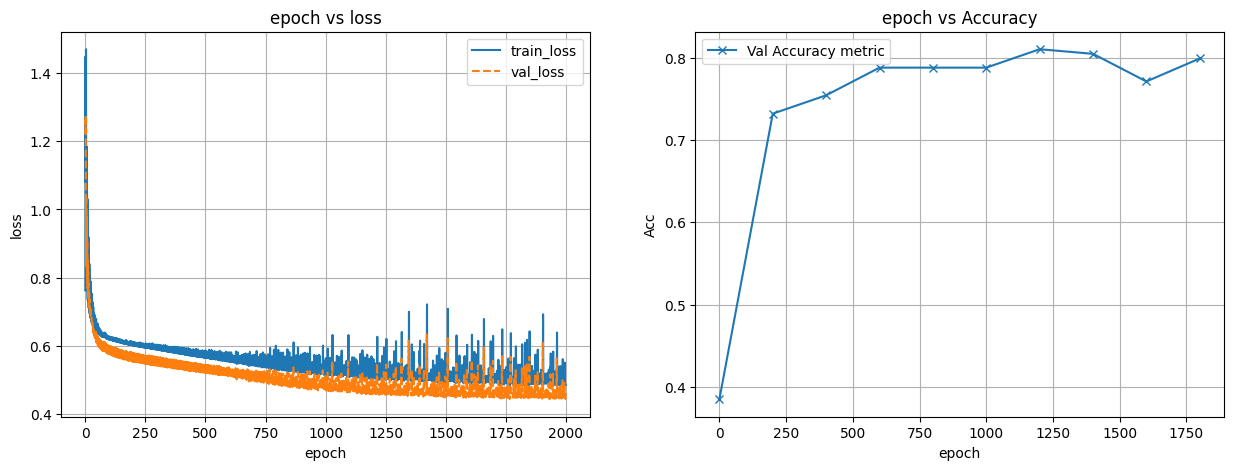

[3. n_layer: 3 || hidden_unit: 300]
Epoch:  0 Accuracy:  61.452513966480446 % || MAX_acc:  61.452513966480446 %
Epoch:  200 Accuracy:  68.71508379888269 % || MAX_acc:  75.41899441340783 %
Epoch:  400 Accuracy:  70.39106145251397 % || MAX_acc:  75.41899441340783 %
Epoch:  600 Accuracy:  73.18435754189943 % || MAX_acc:  75.97765363128491 %
Epoch:  800 Accuracy:  73.18435754189943 % || MAX_acc:  77.6536312849162 %
Epoch:  1000 Accuracy:  74.30167597765363 % || MAX_acc:  79.3296089385475 %
Epoch:  1200 Accuracy:  75.97765363128491 % || MAX_acc:  79.3296089385475 %
Epoch:  1400 Accuracy:  77.6536312849162 % || MAX_acc:  81.00558659217877 %
Epoch:  1600 Accuracy:  77.09497206703911 % || MAX_acc:  81.56424581005587 %
Epoch:  1800 Accuracy:  81.00558659217877 % || MAX_acc:  83.24022346368714 %


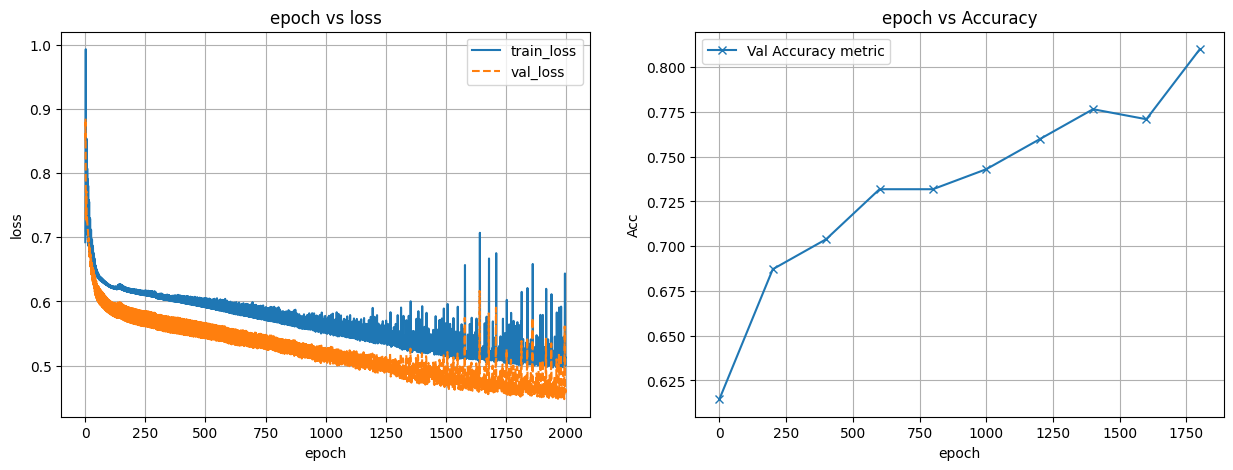

In [22]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# ===== Construct Optimizer ====== #
lr = 0.005 # Learning Rate
epoch = 2000 

# Hyperparameter tuning
n_layer_list = [1, 2, 3]
hidden_unit_list = [500, 300]

hp_dict = dict() #{}

for j, n_layer in enumerate(n_layer_list): 
    for hidden_unit in hidden_unit_list:     
        print(f"[{j+1}. n_layer: {n_layer} || hidden_unit: {hidden_unit}]")
        
        list_epoch = [] 
        list_train_loss = []
        list_val_loss = []
        list_acc = []
        list_acc_epoch = []
        max_acc = 0 
        
        # ====== Construct Model ====== #        
        model = MLPModel(num_features, num_class, hidden_unit, n_layer)
        optimizer = optim.SGD(model.parameters(), lr=lr) # Optimizer
        #print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) 
        
        for i in range(epoch):            
            # ====== Train ====== #
            model.train() 
            optimizer.zero_grad() # set remaining gradient to 0
            
            input_x = torch.Tensor(X_train)
            true_y = torch.Tensor(y_train).long() 
            pred_y = model(input_x)
            
            loss = criterion(pred_y, true_y)  # criterion(pred_y.squeeze(), true_y) 
            loss.backward() # calculate gradient 
            optimizer.step() # step(): update parameters
            list_epoch.append(i)
            list_train_loss.append(loss.detach().numpy()) 
            
            # ====== Validation ====== #
            model.eval()
            optimizer.zero_grad()
            input_x = torch.Tensor(X_val)
            true_y = torch.Tensor(y_val).long()
            pred_y = model(input_x)   
            
            loss = criterion(pred_y, true_y)
            list_val_loss.append(loss.detach().numpy())  

            # ====== Calculate Accuracy ====== #
            pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
            curr_acc = accuracy_score(true_y, pred_y) 

            if curr_acc > max_acc:
                max_acc = curr_acc
                key = (n_layer, hidden_unit)
                hp_dict[key] = max_acc
                # print(f"Epoch: {i} || curr_acc: {curr_acc} || max_acc: {max_acc}")    
                # torch.save(model, "best_model.pt")
        
            # ====== Evaluation ======= #
            if i % 200 == 0: # plot at every 200th iteration                                    
                list_acc.append(curr_acc)
                list_acc_epoch.append(i)
                print('Epoch: ', i,  'Accuracy: ', curr_acc*100, '%', '|| MAX_acc: ', max_acc*100, '%')
                
        plot(list_epoch, list_train_loss, list_val_loss, list_acc_epoch, list_acc)

In [23]:
# TODO:
# 가능한 모든 경우의 수에 대해서 MAX_ACC 구한다
# 1. n_layer: 1 || hidden_unit: 500 >>>>  MAX_acc:  82.68156424581005 %
# ...
# 6.

print("key: (n_hidden_layer, hidden_unit) || value: max val accuracy")
print("--------------------------------------------------------------")
for key, value in hp_dict.items():
    print(f"key: {key} || value: {value}")

key: (n_hidden_layer, hidden_unit) || value: max val accuracy
--------------------------------------------------------------
key: (1, 500) || value: 0.8156424581005587
key: (1, 300) || value: 0.8324022346368715
key: (2, 500) || value: 0.8324022346368715
key: (2, 300) || value: 0.8268156424581006
key: (3, 500) || value: 0.8324022346368715
key: (3, 300) || value: 0.8324022346368715


In [24]:
# SUBMISSION
model = model #logreg 
ids = test_simple['PassengerId']

test_simple = test_simple.drop('PassengerId', axis=1)

# sklearn model prediction
# predictions = model.predict(test_simple.drop('PassengerId', axis=1)) sklearn

# How to get class from model output?
#1. torch.max(model_outputs.data, 1)
#2. model_outputs.detach().max(dim=1)[1].numpy() 
input_x = torch.Tensor(np.array(test_simple))
predictions = model(input_x).detach().max(dim=1)[1].numpy() 

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [25]:
output.to_csv('submission.csv', index=False)